# **SPAM MAIL DETECTION**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files

uploaded = files.upload()

Saving mail_data.csv to mail_data.csv


In [3]:
df = pd.read_csv("mail_data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isnull().sum()

,0
Category,0
Message,0


In [7]:
data = df.where((pd.notnull(df)),'')

In [9]:
data['category'] = data['Category'].apply(lambda x: 1 if x == 'ham' else 0)

In [10]:
print(data)

     Category                                            Message  category
0         ham  Go until jurong point, crazy.. Available only ...         1
1         ham                      Ok lar... Joking wif u oni...         1
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...         0
3         ham  U dun say so early hor... U c already then say...         1
4         ham  Nah I don't think he goes to usf, he lives aro...         1
...       ...                                                ...       ...
5567     spam  This is the 2nd time we have tried 2 contact u...         0
5568      ham               Will ü b going to esplanade fr home?         1
5569      ham  Pity, * was in mood for that. So...any other s...         1
5570      ham  The guy did some bitching but I acted like i'd...         1
5571      ham                         Rofl. Its true to its name         1

[5572 rows x 3 columns]


In [11]:
data.drop(columns=['Category'])

,Message,category
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0
5568,Will ü b going to esplanade fr home?,1
5569,"Pity, * was in mood for that. So...any other s...",1
5570,The guy did some bitching but I acted like i'd...,1


In [12]:
X = data['Message']
y = data['category']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Transorm data into feature vectors
# Creating a TfidfVectorizer for feature extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Transforming the training data into TF-IDF feature matrix
X_train_feature = feature_extraction.fit_transform(X_train)

# Transforming the test data using the same vectorizer as used for training data
X_test_feature = feature_extraction.transform(X_test)

# Converting the data type of training labels to integer
y_train = y_train.astype('int')

# Converting the data type of test labels to integer
y_test = y_test.astype('int')

In [15]:
print(X_train_feature)

  (0, 5512)	0.1898892037332199
  (0, 7222)	0.2173884735352799
  (0, 258)	0.2379428657041507
  (0, 7162)	0.2550284465664535
  (0, 354)	0.3544175987866074
  (0, 2724)	0.3544175987866074
  (0, 7300)	0.24288153842988894
  (0, 2049)	0.3034375179183143
  (0, 3262)	0.33791755486732394
  (0, 5800)	0.17558937755823417
  (0, 6264)	0.1898892037332199
  (0, 694)	0.3171299579602537
  (0, 2497)	0.2442158912653505
  (0, 5818)	0.22682143517864364
  (1, 3267)	0.26787130770292167
  (1, 6109)	0.32397626344658004
  (1, 6738)	0.28986069568917994
  (1, 2335)	0.21623212751660786
  (1, 5650)	0.3604441444703179
  (1, 3333)	0.20665394084233094
  (1, 2440)	0.3387054464839871
  (1, 4509)	0.40282459910606705
  (1, 3932)	0.24325511357721422
  (1, 3804)	0.19029023465152678
  (1, 2555)	0.3840709491751003
  :	:
  (4452, 3084)	0.22948428918295163
  (4452, 3290)	0.26370969643076225
  (4452, 3978)	0.4574160733416501
  (4452, 7280)	0.3968991650168732
  (4452, 2438)	0.4574160733416501
  (4452, 7264)	0.479751063610169
  (44

In [16]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(X_train_feature, y_train)

print("Model Training Complete!")

Model Training Complete!


In [17]:
# Predict on test data
y_pred = model.predict(X_test_feature)

# Predict on training data (for comparison)
y_train_pred = model.predict(X_train_feature)

In [18]:
from sklearn.metrics import accuracy_score

# Accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.14%
Test Accuracy: 97.67%


In [19]:
from sklearn.metrics import classification_report

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90       149
           1       0.97      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



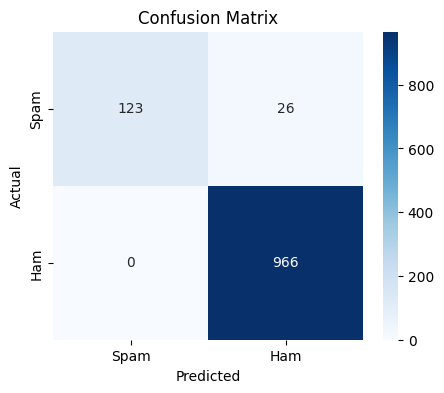

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 5, 10]}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_feature, y_train)

# Best hyperparameter
print("Best Alpha:", grid_search.best_params_['alpha'])

# Train the best model again
best_model = MultinomialNB(alpha=grid_search.best_params_['alpha'])
best_model.fit(X_train_feature, y_train)

# Predict and evaluate again
y_pred_best = best_model.predict(X_test_feature)
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best) * 100)

Best Alpha: 0.1
Optimized Model Accuracy: 98.65470852017937


In [22]:
input_your_mail = ["Hi frnd, which is best way to avoid missunderstding wit our beloved one's?"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)

if(prediction[0] == 1):
  print("Ham mail")
else:
  print("Spam mail")

Ham mail
